In [2]:
import json

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')
import dateutil

from sklearn.preprocessing import StandardScaler

In [3]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='FBG|RBG').columns
fbg_cols = data.filter(regex='FBG').columns
rbg_cols = data.filter(regex='RBG').columns
pval_cols = data.filter(regex='pval').columns

n = data.filter(regex='1091|1093')                 # normal
i = data.filter(regex='1060|1062|1074|1092|1102')  # impaired
d = data.filter(regex='1076|1082|1101')            # diabetic

f = data[fbg_cols]  # fasted
r = data[rbg_cols]  # random-fed

fn = n.filter(fbg_cols)  # fasted normal 
fi = i.filter(fbg_cols)  # fasted impaired
fd = d.filter(fbg_cols)  # fasted diabetic

rn = n.filter(rbg_cols)  # random normal
ri = i.filter(rbg_cols)  # random impaired
rd = d.filter(rbg_cols)  # random diabetic

order_cols = rn.columns.to_list() + fn.columns.to_list() + \
                ri.columns.to_list() + fi.columns.to_list() + \
                rd.columns.to_list() + fd.columns.to_list()

qval_sampling = data['fdr corrected pval effect of sampling']
qval_gtol = data['fdr corrected pval effect of glucose tolerance']
qval_cross = data['fdr corrected pval effect of interaction sampling and glucose tolerance']

In [26]:
# colors
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)
    
with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
    class_map = json.load(infile)

In [63]:
lm_pal = sns.color_palette('Set2', n_colors=2)
# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
display(lm_pal)

display(sns.color_palette('colorblind', 15))
blindcolor = sns.color_palette('colorblind', 15)
rbg_color = blindcolor[0]
fbg_color = blindcolor[1]
normal_color = blindcolor[2]
impaired_color = blindcolor[7]
diabetic_color = blindcolor[4]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

In [5]:
data

,Unique ID,Type,Proposed ID,Found in Tracefinder,Compound Class,m/z,RT [min],Area (Max.),Score,Adduct,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
i,,,,,,,,,,,,,,,,,,,,,
l_0,unknown_679.05463_0.536,lipid,unknown,NaN,unknown,679.05463,0.536,24.521584,NaN,NaN,...,22.462249,23.360916,22.399150,23.163419,22.737840,22.116533,23.352451,23.527438,23.858693,23.617549
l_1,unknown_641.1087_0.537,lipid,unknown,NaN,unknown,641.10870,0.537,25.718750,NaN,NaN,...,24.663849,23.700392,23.382317,24.385568,23.789670,22.248759,22.513249,24.558075,24.818525,24.575904
l_2,unknown_951.15973_0.541,lipid,unknown,NaN,unknown,951.15973,0.541,24.948650,NaN,NaN,...,23.452626,22.549975,23.249352,23.680978,23.989589,23.527507,24.002570,23.886203,24.069137,23.455789
l_3,unknown_329.03067_0.542,lipid,unknown,NaN,unknown,329.03067,0.542,28.102881,NaN,NaN,...,27.210668,26.194952,26.911119,26.805997,26.145097,26.638404,27.217392,26.970428,27.175265,26.482705
l_4,unknown_969.13147_0.544,lipid,unknown,NaN,unknown,969.13147,0.544,24.016735,NaN,NaN,...,22.602208,21.905509,22.226570,22.485669,22.208159,22.236114,23.151359,22.823820,21.750593,22.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_169,unknown_174.00102_9.94,metabolite,unknown,NaN,unknown,174.00102,9.940,25.488336,NaN,[M-H]-1,...,24.942889,24.895636,24.931289,25.067714,25.395219,24.788981,24.894367,25.168366,25.050323,24.771208
m_213,unknown_187.04097_9.971,metabolite,unknown,NaN,unknown,187.04097,9.971,25.075584,52.5,[M-H]-1,...,20.484062,23.047250,23.625874,20.663426,20.698623,20.921984,24.008593,22.538237,21.117720,18.221881
m_24,DL-Lactic Acid_89.02331_9.99,metabolite,DL-Lactic Acid,NaN,CA,89.02331,9.990,28.683584,99.9,[M-H]-1,...,27.236489,27.782425,27.946315,27.362929,27.223422,27.298238,28.052793,27.463850,27.304277,26.282341


In [6]:
data['mean'] = data[order_cols].mean(axis=1)
data['is_unk'] = data['Compound Class'] == 'unknown'

In [40]:
with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
    class_colormap = json.load(infile)

lm_class = data[['Compound Class']]
lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
lm_class.loc[:, 'color'] = lm_class['d'].str[0]
lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
data = data.join(lm_class)
data[['color', 'superclass']]

C:\Users\bjanderson23\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\bjanderson23\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,color,superclass
i,,
l_0,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_1,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_2,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_3,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_4,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
...,...,...
m_169,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_213,"[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_24,"[0.5490196078431373, 0.33725490196078434, 0.29...",Carboxylic Acid


In [22]:
# p = sns.color_palette('Set2', n_colors=10)
# p.append(sns.color_palette('twilight_r', n_colors=15)[4])
# sns.palplot(p)
# print(p)

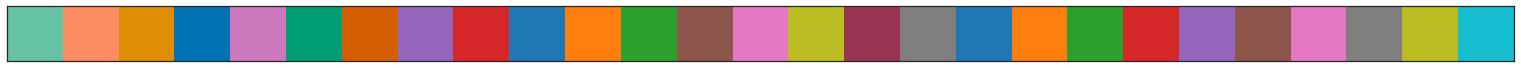

In [21]:
sns.palplot(colors.values())

Text(0.5, 0, 'Retention Time (min)')

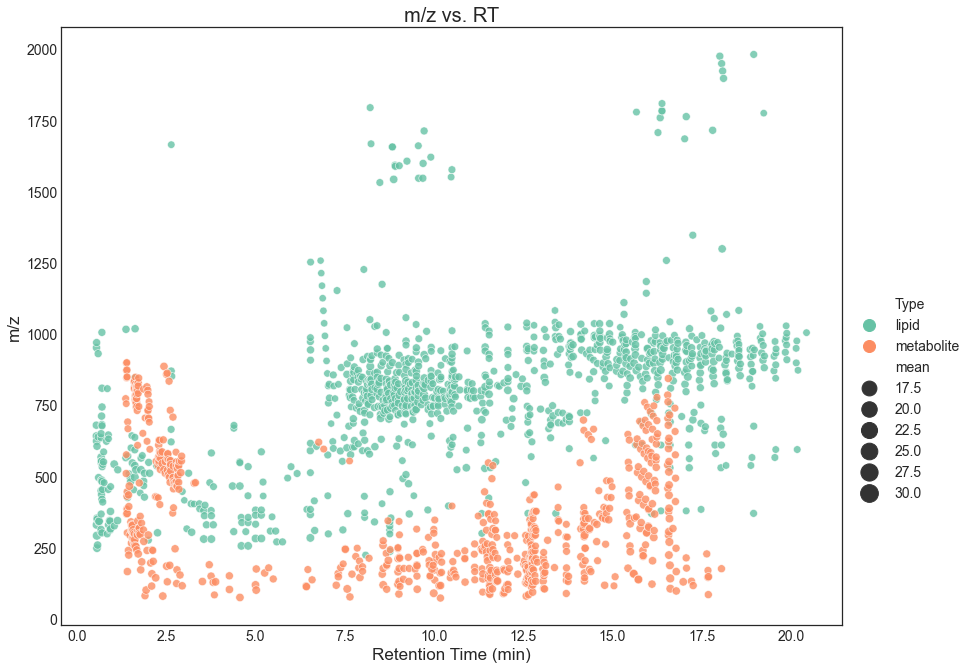

In [12]:
# # Plot unknowns with custom parameters
# sns.scatterplot(x='RT [min]', y='m/z', data=data.loc[data['is_unk']],
#                 size='mean',
#                 sizes=(20, 40),
#                 hue='superclass',
#                 alpha=0.2,
#                 )
# # Plot knowns
# sns.scatterplot(x='RT [min]', y='m/z', data=data.loc[data['is_unk'] == False],
#                 size='mean',
#                 sizes=(52, 80),
#                 hue='superclass',
#                 alpha=0.8,
#                 )
# Plot all
sns.scatterplot(x='RT [min]', y='m/z', data=data,
                size='mean',
                sizes=(52, 80),
                hue='Type',
                alpha=0.8,
                palette=colors
                )
fig = plt.gcf()
fig.set_size_inches((14,11))

plt.title('m/z vs. RT', fontsize=20)
plt.legend(fontsize=14, loc=(1.01, 0.2), markerscale=2)

plt.yticks(fontsize=14)
plt.ylabel('m/z', fontsize=17)
plt.xticks(fontsize=14)
plt.xlabel('Retention Time (min)', fontsize=17)

In [ ]:
custom_handles, custom_labels = [], []
for superclass, color in list(colors.items())[7:12] + [('Unidentified', colors['Unidentified'])]:
    print(superclass, color)
    custom_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linewidth=0))
    custom_labels.append(superclass)

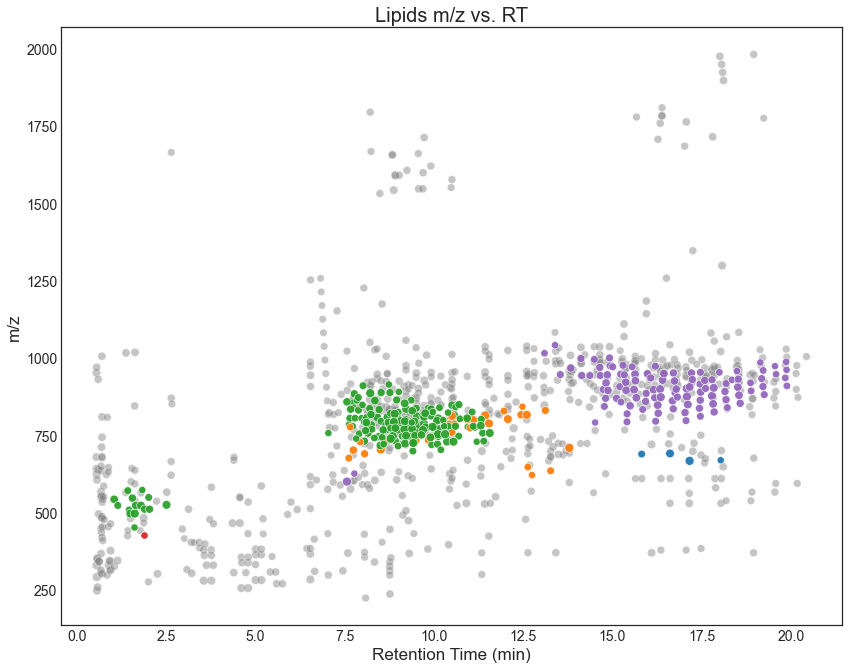

In [45]:
# Plot Lipids 
unique_lipid_classes = data.loc[data['Type'] == 'lipid', 'Compound Class'].unique()
for lipid_class in unique_lipid_classes:
    sns.scatterplot(x='RT [min]', y='m/z', 
                    data=data[(data['Type'] == 'lipid') & (data['Compound Class'] == lipid_class)],
                size='mean',
                sizes=(52, 80),
                alpha=(0.95 if lipid_class != 'unknown' else 0.45),
#                 palette=colors['metabolite'],
                color=class_map[lipid_class][0]
                )

fig = plt.gcf()
fig.set_size_inches((14,11))

plt.title('Lipids m/z vs. RT', fontsize=20)
# plt.legend(fontsize=14, loc=(1.01, 0.2), markerscale=2)
plt.legend(custom_handles, custom_labels, loc=(1.01, 0.2), frameon=False, 
           title='Lipid Superclass', title_fontsize=14)

plt.yticks(fontsize=14)
plt.ylabel('m/z', fontsize=17)
plt.xticks(fontsize=14)
plt.xlabel('Retention Time (min)', fontsize=17)

# plt.savefig(r'..\reports\figures\4-2-1\lipids_mz_rt.svg')

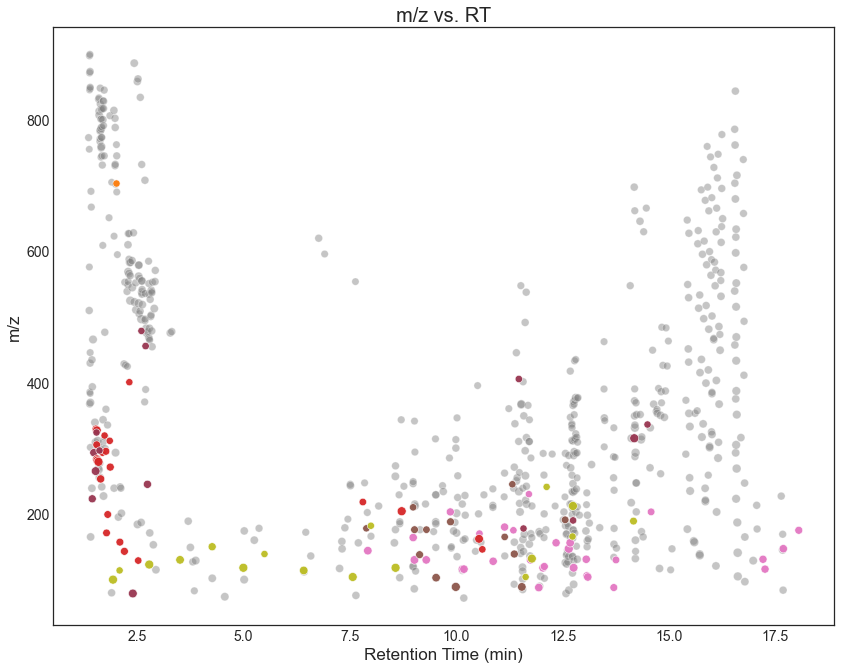

In [46]:
# Plot Metabolites 
unique_metab_classes = data.loc[data['Type'] == 'metabolite', 'Compound Class'].unique()
for metab_class in unique_metab_classes:
    sns.scatterplot(x='RT [min]', y='m/z', 
                    data=data[(data['Type'] == 'metabolite') & (data['Compound Class'] == metab_class)],
                size='mean',
                sizes=(52, 80),
                alpha=(0.95 if metab_class != 'unknown' else 0.45),
#                 palette=colors['metabolite'],
                color=class_map[metab_class][0]
                )

fig = plt.gcf()
fig.set_size_inches((14,11))

plt.title('m/z vs. RT', fontsize=20)
# plt.legend(fontsize=14, loc=(1.01, 0.2), markerscale=2)
plt.legend([])

plt.yticks(fontsize=14)
plt.ylabel('m/z', fontsize=17)
plt.xticks(fontsize=14)
plt.xlabel('Retention Time (min)', fontsize=17)

# plt.savefig(r'..\reports\figures\4-2-1\metabs_mz_rt.svg')

array([[<AxesSubplot:title={'center':'l_179'}>]], dtype=object)

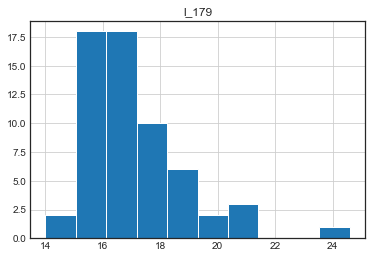

In [10]:
data[data_cols].T.hist()

In [11]:
d = data[data_cols]
d

,1076_10_FBG,1062_8_FBG,1093_9_FBG,1060_8_RBG,1091_10_FBG,1092_9_RBG,1093_10_RBG,1082_10_FBG,1060_9_RBG,1101_9_FBG,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
i,,,,,,,,,,,,,,,,,,,,,
l_0,20.405355,23.313111,23.218699,24.012349,24.302356,23.901455,23.883301,23.387975,24.421692,23.463756,...,22.462249,23.360916,22.399150,23.163419,22.737840,22.116533,23.352451,23.527438,23.858693,23.617549
l_1,21.533648,24.586227,24.375151,25.685664,25.422294,24.936916,24.779941,24.696276,25.054941,24.934805,...,24.663849,23.700392,23.382317,24.385568,23.789670,22.248759,22.513249,24.558075,24.818525,24.575904
l_2,20.665848,23.731244,23.038733,24.916555,24.042666,24.162971,23.627979,24.085858,23.169508,24.010849,...,23.452626,22.549975,23.249352,23.680978,23.989589,23.527507,24.002570,23.886203,24.069137,23.455789
l_3,24.400930,26.811664,26.708762,25.977120,27.313654,27.337061,27.415597,27.230430,27.598719,27.126653,...,27.210668,26.194952,26.911119,26.805997,26.145097,26.638404,27.217392,26.970428,27.175265,26.482705
l_4,19.378685,22.709669,21.722467,23.985839,22.321161,23.184906,22.795191,22.878785,22.397716,22.703282,...,22.602208,21.905509,22.226570,22.485669,22.208159,22.236114,23.151359,22.823820,21.750593,22.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_169,24.882649,24.605962,25.488336,24.568105,24.949127,25.119634,25.008021,24.852314,25.064357,24.826840,...,24.942889,24.895636,24.931289,25.067714,25.395219,24.788981,24.894367,25.168366,25.050323,24.771208
m_213,20.930852,21.303302,19.581065,23.318774,19.437282,23.268904,23.345351,22.052052,17.810755,19.078979,...,20.484062,23.047250,23.625874,20.663426,20.698623,20.921984,24.008593,22.538237,21.117720,18.221881
m_24,27.101820,27.465801,26.936184,27.795283,27.044044,27.561589,27.863524,27.438797,26.430616,26.924145,...,27.236489,27.782425,27.946315,27.362929,27.223422,27.298238,28.052793,27.463850,27.304277,26.282341


Text(0.5, 1.0, 'Mean log2 Feature Quant')

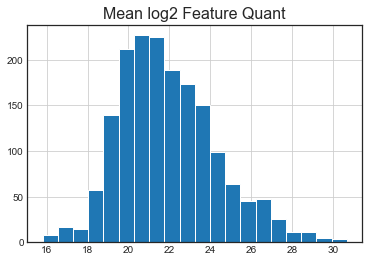

In [70]:
histogram = d.mean(axis=1)
histogram.hist(bins=20)
plt.title('Mean log2 Feature Quant', fontsize=16)

# from sklearn.neighbors import KernelDensity

# kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(histogram.values.reshape(-1, 1))
# plt.plot(np.arange(15, 31, 0.05), 
#          50*(kde.score_samples(np.arange(15, 31, 0.05).reshape(-1, 1))) + 300)